In [1]:
import numpy as np
import pandas as pd

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

import tensorflow as tf
from tensorflow import keras

import operator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Commercial Sector

In [2]:
# read from the csv file
commercial_merged_dataset = pd.read_csv("commercial_regression_new_with_solar.csv")

In [3]:
# get the part for pennsylvania
pa_commercial_data = commercial_merged_dataset.loc[commercial_merged_dataset['PA'] == 1]


In [4]:
# drop columns for other states
pa_commercial_data = pa_commercial_data.drop(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY','area'], axis=1)
pa_commercial_data

,Year,Month,PA,Retail Price(Cents/kWh),CLDD,TAVG,AWND,HTDD,population,solar-generation,Spring,Summer,Fall,Winter,mkwh
37,2014,1,1,10.43,0.000000,20.140602,8.033333,1382.917293,12788313,7,0,0,0,1,3894
87,2014,2,1,10.53,0.000000,23.232520,7.142308,1161.073171,12788022,7,0,0,0,1,3712
137,2014,3,1,10.09,0.000000,30.912950,8.615385,1048.841727,12787732,10,1,0,0,0,3680
187,2014,4,1,9.62,3.820144,48.134532,8.450000,507.323741,12787441,10,1,0,0,0,3337
237,2014,5,1,9.41,34.808511,59.490780,6.353846,204.695035,12787151,11,1,0,0,0,3361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2019,8,1,8.49,192.609023,70.703008,4.780000,16.639098,12802611,17,0,1,0,0,3569
3437,2019,9,1,8.50,88.030534,66.169466,5.052000,53.175573,12802700,14,0,0,1,0,3375
3487,2019,10,1,8.63,21.700787,54.696850,6.572000,339.464567,12802789,12,0,0,1,0,3102
3537,2019,11,1,8.88,0.000000,37.236800,7.148000,825.040000,12802878,9,0,0,1,0,2881


In [5]:
pa_commercial_data.columns

Index(['Year', 'Month', 'PA', 'Retail Price(Cents/kWh)', 'CLDD', 'TAVG',
       'AWND', 'HTDD', 'population', 'solar-generation', 'Spring', 'Summer',
       'Fall', 'Winter', 'mkwh'],
      dtype='object')

In [6]:
# split first

com_train, com_test = train_test_split(pa_commercial_data, test_size=0.2)

X_train_com = com_train.drop(['mkwh', 'Year', 'TAVG', 'PA', 'Spring'],axis = 1)
y_train_com = com_train['mkwh']
X_test_com = com_test.drop(['mkwh', 'Year', 'TAVG', 'PA', 'Spring'],axis = 1)
y_test_com = com_test['mkwh']

In [7]:
y_train_com

487     3407
1737    3351
387     3722
2037    3329
1537    3924
1937    3539
1887    3377
2737    3964
2237    3625
3487    3102
1487    3639
787     3315
1987    3289
737     3774
1837    3745
3087    3484
1287    3668
3537    2881
937     3944
1187    3487
1037    3804
1387    3210
1337    3477
1087    3441
3437    3375
1787    3592
437     3666
1237    3773
1437    3373
2837    3832
2787    3920
3287    3293
2087    3558
2387    3573
687     3753
3337    3408
3187    3154
3387    3569
837     3473
137     3680
3037    3857
3237    3377
2687    3573
287     3650
3587    3092
2887    3492
2487    3474
2287    3456
2587    3328
537     3333
2537    3532
1137    3329
1687    3486
237     3361
2987    3496
2437    3935
2337    3322
Name: mkwh, dtype: int64

In [8]:
# scale the data
numeric_feature_name = ['Retail Price(Cents/kWh)','CLDD', 'AWND', 'HTDD', 
                        'population', 'solar-generation']

categorical_feature_name = ['Year', 'Month', 'Summer', 'Fall', 'Winter']


# scale the train and test data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_com[numeric_feature_name] = min_max_scaler.fit_transform(X_train_com[numeric_feature_name])
X_test_com[numeric_feature_name] = min_max_scaler.transform(X_test_com[numeric_feature_name])

y_train_com = (y_train_com - min(y_train_com))/(max(y_train_com) - min(y_train_com))


In [9]:
X_train_com

,Month,Retail Price(Cents/kWh),CLDD,AWND,HTDD,population,solar-generation,Summer,Fall,Winter
487,10,0.565217,0.015624,0.478822,0.263715,0.165426,0.166667,0,1,0
1737,11,0.416149,0.000927,0.463468,0.480844,0.216122,0.000000,0,1,0
387,8,0.633540,0.395366,0.000000,0.020979,0.193505,0.416667,1,0,0
2037,5,0.409938,0.104163,0.551549,0.185333,0.473275,0.750000,0,0,0
1537,7,0.335404,0.960724,0.145084,0.002666,0.129664,0.583333,1,0,0
1937,3,0.304348,0.000178,1.000000,0.664231,0.366325,0.500000,0,0,0
1887,2,0.509317,0.000077,0.778620,0.577428,0.312826,0.250000,0,0,1
2737,7,0.180124,0.832164,0.133838,0.002211,0.926977,0.916667,1,0,0
2237,9,0.229814,0.305370,0.028721,0.073380,0.687222,0.500000,0,1,0
3487,10,0.093168,0.076137,0.368923,0.250461,0.991398,0.500000,0,1,0


# Commercial_ANN_Training

In [10]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# # Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Fitting the ANN to the training set
classifier.fit(X_train_com, y_train_com, validation_split=0.2, batch_size = 10, epochs = 1200)


Train on 45 samples, validate on 12 samples
Epoch 1/1200
45/45 [==============================] - 1s 15ms/sample - loss: 0.0620 - mae: 0.2027 - val_loss: 0.0235 - val_mae: 0.1039
Epoch 2/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0617 - mae: 0.2023 - val_loss: 0.0235 - val_mae: 0.1038
Epoch 3/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0615 - mae: 0.2020 - val_loss: 0.0234 - val_mae: 0.1036
Epoch 4/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0612 - mae: 0.2015 - val_loss: 0.0233 - val_mae: 0.1033
Epoch 5/1200
45/45 [==============================] - 0s 599us/sample - loss: 0.0610 - mae: 0.2012 - val_loss: 0.0233 - val_mae: 0.1031
Epoch 6/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0606 - mae: 0.2006 - val_loss: 0.0232 - val_mae: 0.1028
Epoch 7/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0603 - mae: 0.2002 - val_loss: 0.0231 - val_mae: 0.1024
Epoch

45/45 [==============================] - 0s 487us/sample - loss: 0.0424 - mae: 0.1679 - val_loss: 0.0197 - val_mae: 0.1027
Epoch 60/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0420 - mae: 0.1673 - val_loss: 0.0195 - val_mae: 0.1026
Epoch 61/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0417 - mae: 0.1666 - val_loss: 0.0192 - val_mae: 0.1018
Epoch 62/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0412 - mae: 0.1657 - val_loss: 0.0188 - val_mae: 0.1009
Epoch 63/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0411 - mae: 0.1650 - val_loss: 0.0185 - val_mae: 0.1003
Epoch 64/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0407 - mae: 0.1643 - val_loss: 0.0185 - val_mae: 0.1008
Epoch 65/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0405 - mae: 0.1639 - val_loss: 0.0186 - val_mae: 0.1019
Epoch 66/1200
45/45 [==============================] - 

45/45 [==============================] - 0s 465us/sample - loss: 0.0311 - mae: 0.1427 - val_loss: 0.0158 - val_mae: 0.1051
Epoch 119/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0310 - mae: 0.1426 - val_loss: 0.0161 - val_mae: 0.1056
Epoch 120/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0309 - mae: 0.1424 - val_loss: 0.0158 - val_mae: 0.1053
Epoch 121/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0306 - mae: 0.1416 - val_loss: 0.0161 - val_mae: 0.1059
Epoch 122/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0306 - mae: 0.1423 - val_loss: 0.0164 - val_mae: 0.1062
Epoch 123/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0306 - mae: 0.1420 - val_loss: 0.0160 - val_mae: 0.1058
Epoch 124/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0302 - mae: 0.1410 - val_loss: 0.0161 - val_mae: 0.1060
Epoch 125/1200
45/45 [===========================

45/45 [==============================] - 0s 643us/sample - loss: 0.0253 - mae: 0.1249 - val_loss: 0.0152 - val_mae: 0.1060
Epoch 178/1200
45/45 [==============================] - 0s 687us/sample - loss: 0.0253 - mae: 0.1246 - val_loss: 0.0151 - val_mae: 0.1059
Epoch 179/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0252 - mae: 0.1245 - val_loss: 0.0152 - val_mae: 0.1058
Epoch 180/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0252 - mae: 0.1244 - val_loss: 0.0153 - val_mae: 0.1057
Epoch 181/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0251 - mae: 0.1242 - val_loss: 0.0151 - val_mae: 0.1060
Epoch 182/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0251 - mae: 0.1239 - val_loss: 0.0153 - val_mae: 0.1061
Epoch 183/1200
45/45 [==============================] - 0s 665us/sample - loss: 0.0250 - mae: 0.1240 - val_loss: 0.0155 - val_mae: 0.1061
Epoch 184/1200
45/45 [===========================

45/45 [==============================] - 0s 466us/sample - loss: 0.0225 - mae: 0.1151 - val_loss: 0.0158 - val_mae: 0.1082
Epoch 237/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0224 - mae: 0.1154 - val_loss: 0.0158 - val_mae: 0.1084
Epoch 238/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0223 - mae: 0.1148 - val_loss: 0.0157 - val_mae: 0.1088
Epoch 239/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0225 - mae: 0.1151 - val_loss: 0.0158 - val_mae: 0.1086
Epoch 240/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0223 - mae: 0.1146 - val_loss: 0.0159 - val_mae: 0.1084
Epoch 241/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0222 - mae: 0.1147 - val_loss: 0.0159 - val_mae: 0.1085
Epoch 242/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0221 - mae: 0.1144 - val_loss: 0.0159 - val_mae: 0.1087
Epoch 243/1200
45/45 [===========================

45/45 [==============================] - 0s 531us/sample - loss: 0.0208 - mae: 0.1082 - val_loss: 0.0170 - val_mae: 0.1115
Epoch 296/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0209 - mae: 0.1093 - val_loss: 0.0171 - val_mae: 0.1111
Epoch 297/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0208 - mae: 0.1088 - val_loss: 0.0171 - val_mae: 0.1115
Epoch 298/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0208 - mae: 0.1085 - val_loss: 0.0170 - val_mae: 0.1116
Epoch 299/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0208 - mae: 0.1075 - val_loss: 0.0171 - val_mae: 0.1116
Epoch 300/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0207 - mae: 0.1084 - val_loss: 0.0172 - val_mae: 0.1111
Epoch 301/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0210 - mae: 0.1091 - val_loss: 0.0172 - val_mae: 0.1111
Epoch 302/1200
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0198 - mae: 0.1047 - val_loss: 0.0180 - val_mae: 0.1145
Epoch 355/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0198 - mae: 0.1042 - val_loss: 0.0181 - val_mae: 0.1154
Epoch 356/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0199 - mae: 0.1042 - val_loss: 0.0179 - val_mae: 0.1152
Epoch 357/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0202 - mae: 0.1039 - val_loss: 0.0180 - val_mae: 0.1156
Epoch 358/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0196 - mae: 0.1029 - val_loss: 0.0181 - val_mae: 0.1147
Epoch 359/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0199 - mae: 0.1046 - val_loss: 0.0182 - val_mae: 0.1143
Epoch 360/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0201 - mae: 0.1047 - val_loss: 0.0181 - val_mae: 0.1147
Epoch 361/1200
45/45 [===========================

45/45 [==============================] - 0s 576us/sample - loss: 0.0190 - mae: 0.1005 - val_loss: 0.0188 - val_mae: 0.1191
Epoch 414/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0193 - mae: 0.1011 - val_loss: 0.0187 - val_mae: 0.1175
Epoch 415/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0196 - mae: 0.1020 - val_loss: 0.0188 - val_mae: 0.1185
Epoch 416/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0197 - mae: 0.1025 - val_loss: 0.0188 - val_mae: 0.1187
Epoch 417/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0193 - mae: 0.1020 - val_loss: 0.0188 - val_mae: 0.1194
Epoch 418/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0198 - mae: 0.1035 - val_loss: 0.0188 - val_mae: 0.1196
Epoch 419/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0193 - mae: 0.1011 - val_loss: 0.0189 - val_mae: 0.1194
Epoch 420/1200
45/45 [===========================

45/45 [==============================] - 0s 443us/sample - loss: 0.0187 - mae: 0.0991 - val_loss: 0.0196 - val_mae: 0.1232
Epoch 473/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0189 - mae: 0.0997 - val_loss: 0.0196 - val_mae: 0.1231
Epoch 474/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0187 - mae: 0.0991 - val_loss: 0.0195 - val_mae: 0.1230
Epoch 475/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0189 - mae: 0.0999 - val_loss: 0.0195 - val_mae: 0.1228
Epoch 476/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0188 - mae: 0.0990 - val_loss: 0.0196 - val_mae: 0.1232
Epoch 477/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0187 - mae: 0.0992 - val_loss: 0.0197 - val_mae: 0.1233
Epoch 478/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0189 - mae: 0.1001 - val_loss: 0.0196 - val_mae: 0.1232
Epoch 479/1200
45/45 [===========================

45/45 [==============================] - 0s 577us/sample - loss: 0.0185 - mae: 0.0983 - val_loss: 0.0201 - val_mae: 0.1248
Epoch 532/1200
45/45 [==============================] - 0s 665us/sample - loss: 0.0186 - mae: 0.0995 - val_loss: 0.0201 - val_mae: 0.1248
Epoch 533/1200
45/45 [==============================] - 0s 644us/sample - loss: 0.0184 - mae: 0.0989 - val_loss: 0.0200 - val_mae: 0.1250
Epoch 534/1200
45/45 [==============================] - 0s 620us/sample - loss: 0.0184 - mae: 0.0984 - val_loss: 0.0199 - val_mae: 0.1245
Epoch 535/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0188 - mae: 0.0991 - val_loss: 0.0198 - val_mae: 0.1241
Epoch 536/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0186 - mae: 0.0977 - val_loss: 0.0199 - val_mae: 0.1250
Epoch 537/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0184 - mae: 0.0982 - val_loss: 0.0201 - val_mae: 0.1254
Epoch 538/1200
45/45 [===========================

Epoch 590/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0183 - mae: 0.0985 - val_loss: 0.0202 - val_mae: 0.1257
Epoch 591/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0182 - mae: 0.0979 - val_loss: 0.0204 - val_mae: 0.1260
Epoch 592/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0184 - mae: 0.0994 - val_loss: 0.0204 - val_mae: 0.1260
Epoch 593/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0182 - mae: 0.0980 - val_loss: 0.0202 - val_mae: 0.1259
Epoch 594/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0185 - mae: 0.0983 - val_loss: 0.0201 - val_mae: 0.1257
Epoch 595/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0185 - mae: 0.0978 - val_loss: 0.0202 - val_mae: 0.1260
Epoch 596/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0183 - mae: 0.0978 - val_loss: 0.0203 - val_mae: 0.1264
Epoch 597/1200
45/45 [============

45/45 [==============================] - 0s 510us/sample - loss: 0.0184 - mae: 0.0983 - val_loss: 0.0204 - val_mae: 0.1269
Epoch 650/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0182 - mae: 0.0981 - val_loss: 0.0206 - val_mae: 0.1271
Epoch 651/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0182 - mae: 0.0989 - val_loss: 0.0206 - val_mae: 0.1272
Epoch 652/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0181 - mae: 0.0981 - val_loss: 0.0205 - val_mae: 0.1273
Epoch 653/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0187 - mae: 0.0993 - val_loss: 0.0203 - val_mae: 0.1266
Epoch 654/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0187 - mae: 0.0987 - val_loss: 0.0204 - val_mae: 0.1273
Epoch 655/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0182 - mae: 0.0984 - val_loss: 0.0205 - val_mae: 0.1275
Epoch 656/1200
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0179 - mae: 0.0977 - val_loss: 0.0205 - val_mae: 0.1282
Epoch 709/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0182 - mae: 0.0964 - val_loss: 0.0205 - val_mae: 0.1283
Epoch 710/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0183 - mae: 0.0973 - val_loss: 0.0207 - val_mae: 0.1286
Epoch 711/1200
45/45 [==============================] - 0s 511us/sample - loss: 0.0181 - mae: 0.0969 - val_loss: 0.0207 - val_mae: 0.1287
Epoch 712/1200
45/45 [==============================] - 0s 489us/sample - loss: 0.0181 - mae: 0.0969 - val_loss: 0.0206 - val_mae: 0.1285
Epoch 713/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0183 - mae: 0.0985 - val_loss: 0.0208 - val_mae: 0.1284
Epoch 714/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0180 - mae: 0.0973 - val_loss: 0.0207 - val_mae: 0.1286
Epoch 715/1200
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0180 - mae: 0.0982 - val_loss: 0.0210 - val_mae: 0.1286
Epoch 768/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0180 - mae: 0.0973 - val_loss: 0.0208 - val_mae: 0.1286
Epoch 769/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0180 - mae: 0.0972 - val_loss: 0.0209 - val_mae: 0.1285
Epoch 770/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0180 - mae: 0.0976 - val_loss: 0.0209 - val_mae: 0.1285
Epoch 771/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0179 - mae: 0.0976 - val_loss: 0.0209 - val_mae: 0.1283
Epoch 772/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0179 - mae: 0.0981 - val_loss: 0.0209 - val_mae: 0.1285
Epoch 773/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0180 - mae: 0.0976 - val_loss: 0.0207 - val_mae: 0.1284
Epoch 774/1200
45/45 [===========================

45/45 [==============================] - 0s 487us/sample - loss: 0.0180 - mae: 0.0986 - val_loss: 0.0212 - val_mae: 0.1296
Epoch 827/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0178 - mae: 0.0973 - val_loss: 0.0208 - val_mae: 0.1293
Epoch 828/1200
45/45 [==============================] - 0s 553us/sample - loss: 0.0180 - mae: 0.0968 - val_loss: 0.0210 - val_mae: 0.1296
Epoch 829/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0179 - mae: 0.0965 - val_loss: 0.0210 - val_mae: 0.1295
Epoch 830/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0180 - mae: 0.0966 - val_loss: 0.0210 - val_mae: 0.1296
Epoch 831/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0180 - mae: 0.0975 - val_loss: 0.0213 - val_mae: 0.1300
Epoch 832/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0180 - mae: 0.0985 - val_loss: 0.0211 - val_mae: 0.1296
Epoch 833/1200
45/45 [===========================

45/45 [==============================] - 0s 442us/sample - loss: 0.0178 - mae: 0.0982 - val_loss: 0.0210 - val_mae: 0.1297
Epoch 886/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0180 - mae: 0.0973 - val_loss: 0.0209 - val_mae: 0.1295
Epoch 887/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0181 - mae: 0.0977 - val_loss: 0.0212 - val_mae: 0.1299
Epoch 888/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0179 - mae: 0.0977 - val_loss: 0.0211 - val_mae: 0.1298
Epoch 889/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0180 - mae: 0.0976 - val_loss: 0.0210 - val_mae: 0.1298
Epoch 890/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0178 - mae: 0.0970 - val_loss: 0.0212 - val_mae: 0.1301
Epoch 891/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0178 - mae: 0.0982 - val_loss: 0.0213 - val_mae: 0.1302
Epoch 892/1200
45/45 [===========================

45/45 [==============================] - 0s 576us/sample - loss: 0.0178 - mae: 0.0969 - val_loss: 0.0212 - val_mae: 0.1304
Epoch 945/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0179 - mae: 0.0970 - val_loss: 0.0212 - val_mae: 0.1303
Epoch 946/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0178 - mae: 0.0971 - val_loss: 0.0214 - val_mae: 0.1304
Epoch 947/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0180 - mae: 0.0994 - val_loss: 0.0214 - val_mae: 0.1307
Epoch 948/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0178 - mae: 0.0986 - val_loss: 0.0213 - val_mae: 0.1303
Epoch 949/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0179 - mae: 0.0971 - val_loss: 0.0211 - val_mae: 0.1301
Epoch 950/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0179 - mae: 0.0968 - val_loss: 0.0212 - val_mae: 0.1302
Epoch 951/1200
45/45 [===========================

45/45 [==============================] - 0s 465us/sample - loss: 0.0175 - mae: 0.0985 - val_loss: 0.0211 - val_mae: 0.1291
Epoch 1004/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0176 - mae: 0.0980 - val_loss: 0.0210 - val_mae: 0.1290
Epoch 1005/1200
45/45 [==============================] - 0s 420us/sample - loss: 0.0182 - mae: 0.0978 - val_loss: 0.0208 - val_mae: 0.1284
Epoch 1006/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0175 - mae: 0.0954 - val_loss: 0.0211 - val_mae: 0.1291
Epoch 1007/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0176 - mae: 0.0999 - val_loss: 0.0217 - val_mae: 0.1309
Epoch 1008/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0177 - mae: 0.1005 - val_loss: 0.0212 - val_mae: 0.1294
Epoch 1009/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0178 - mae: 0.0977 - val_loss: 0.0209 - val_mae: 0.1289
Epoch 1010/1200
45/45 [====================

45/45 [==============================] - 0s 687us/sample - loss: 0.0173 - mae: 0.0974 - val_loss: 0.0212 - val_mae: 0.1284
Epoch 1063/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0173 - mae: 0.0987 - val_loss: 0.0219 - val_mae: 0.1301
Epoch 1064/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0174 - mae: 0.0997 - val_loss: 0.0217 - val_mae: 0.1291
Epoch 1065/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0173 - mae: 0.0982 - val_loss: 0.0213 - val_mae: 0.1288
Epoch 1066/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0172 - mae: 0.0977 - val_loss: 0.0214 - val_mae: 0.1290
Epoch 1067/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0174 - mae: 0.0973 - val_loss: 0.0211 - val_mae: 0.1285
Epoch 1068/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0172 - mae: 0.0965 - val_loss: 0.0212 - val_mae: 0.1287
Epoch 1069/1200
45/45 [====================

45/45 [==============================] - 0s 465us/sample - loss: 0.0172 - mae: 0.0984 - val_loss: 0.0218 - val_mae: 0.1298
Epoch 1122/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0173 - mae: 0.1000 - val_loss: 0.0219 - val_mae: 0.1303
Epoch 1123/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0173 - mae: 0.0984 - val_loss: 0.0206 - val_mae: 0.1276
Epoch 1124/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0173 - mae: 0.0967 - val_loss: 0.0205 - val_mae: 0.1275
Epoch 1125/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0172 - mae: 0.0964 - val_loss: 0.0205 - val_mae: 0.1274
Epoch 1126/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0172 - mae: 0.0973 - val_loss: 0.0211 - val_mae: 0.1282
Epoch 1127/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0171 - mae: 0.0985 - val_loss: 0.0213 - val_mae: 0.1285
Epoch 1128/1200
45/45 [====================

45/45 [==============================] - 0s 510us/sample - loss: 0.0172 - mae: 0.1010 - val_loss: 0.0222 - val_mae: 0.1313
Epoch 1181/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0172 - mae: 0.0990 - val_loss: 0.0211 - val_mae: 0.1285
Epoch 1182/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0170 - mae: 0.0979 - val_loss: 0.0217 - val_mae: 0.1293
Epoch 1183/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0170 - mae: 0.0983 - val_loss: 0.0216 - val_mae: 0.1291
Epoch 1184/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0171 - mae: 0.0980 - val_loss: 0.0211 - val_mae: 0.1284
Epoch 1185/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0170 - mae: 0.0977 - val_loss: 0.0214 - val_mae: 0.1286
Epoch 1186/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0170 - mae: 0.0979 - val_loss: 0.0214 - val_mae: 0.1287
Epoch 1187/1200
45/45 [====================

In [11]:
# Predicting the Test set results
com_predictions = classifier.predict(X_test_com)
# Scale y back 
com_predictions = (com_predictions * (max(y_test_com) - min(y_test_com))) + min(y_test_com)
com_predictions = com_predictions.reshape(-1)
df_com_pred = pd.DataFrame({'Actual': y_test_com, 'Predicted': com_predictions})

In [12]:
com_predictions

array([4048.1912, 3995.5103, 4081.0073, 4097.1855, 3986.319 , 3838.8904,
       3801.8481, 3606.3809, 3608.005 , 3632.3467, 4047.184 , 3655.356 ,
       4071.85  , 4061.5144, 4149.554 ], dtype=float32)

In [13]:
def evaluate_performances(y_test, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))

In [14]:
#Visualize the output

def visualize_graph(df_pred):
    fig, axes = plt.subplots(3,1, figsize=(7,15))
    #Plot the result in box plot
    df_pred.plot(title="Actual vs. Predict result box plot",kind='box',ax=axes[0])
    #Plot the scatter plot 
    df_pred.plot.scatter(title="Actual vs. Predict result scatter plot",  x='Actual',y='Predicted', c='DarkBlue',ax=axes[1])
    #Plot the result in terms of kernel density estimation
    df_pred.plot(title="Actual vs. Predict result kernel density estimation", kind='density',ax=axes[2])

Mean Absolute Error: 176.26897786458332
Mean Squared Error: 45872.653227551775
Root Mean Squared Error: 214.1790214459665


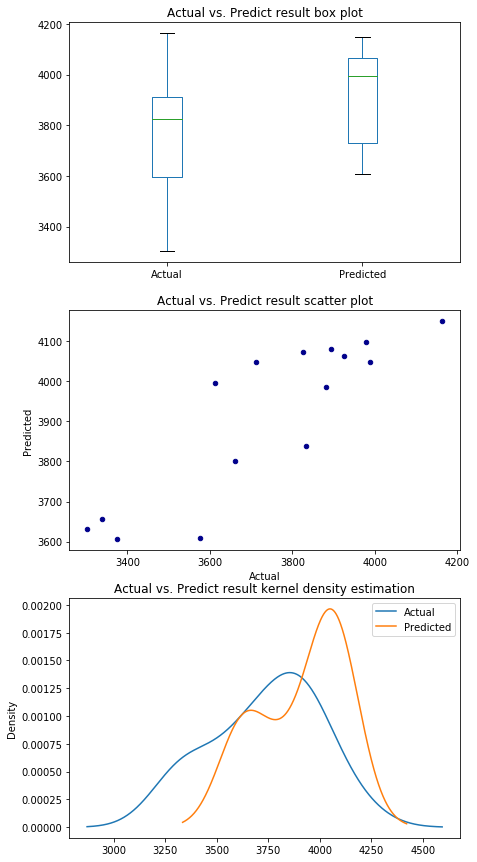

In [15]:
evaluate_performances(y_test_com, com_predictions)

#visualize
visualize_graph(df_com_pred)

In [16]:
# Visualization
def visualization(y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_pred)),y_pred,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_pred)),y_test_com,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

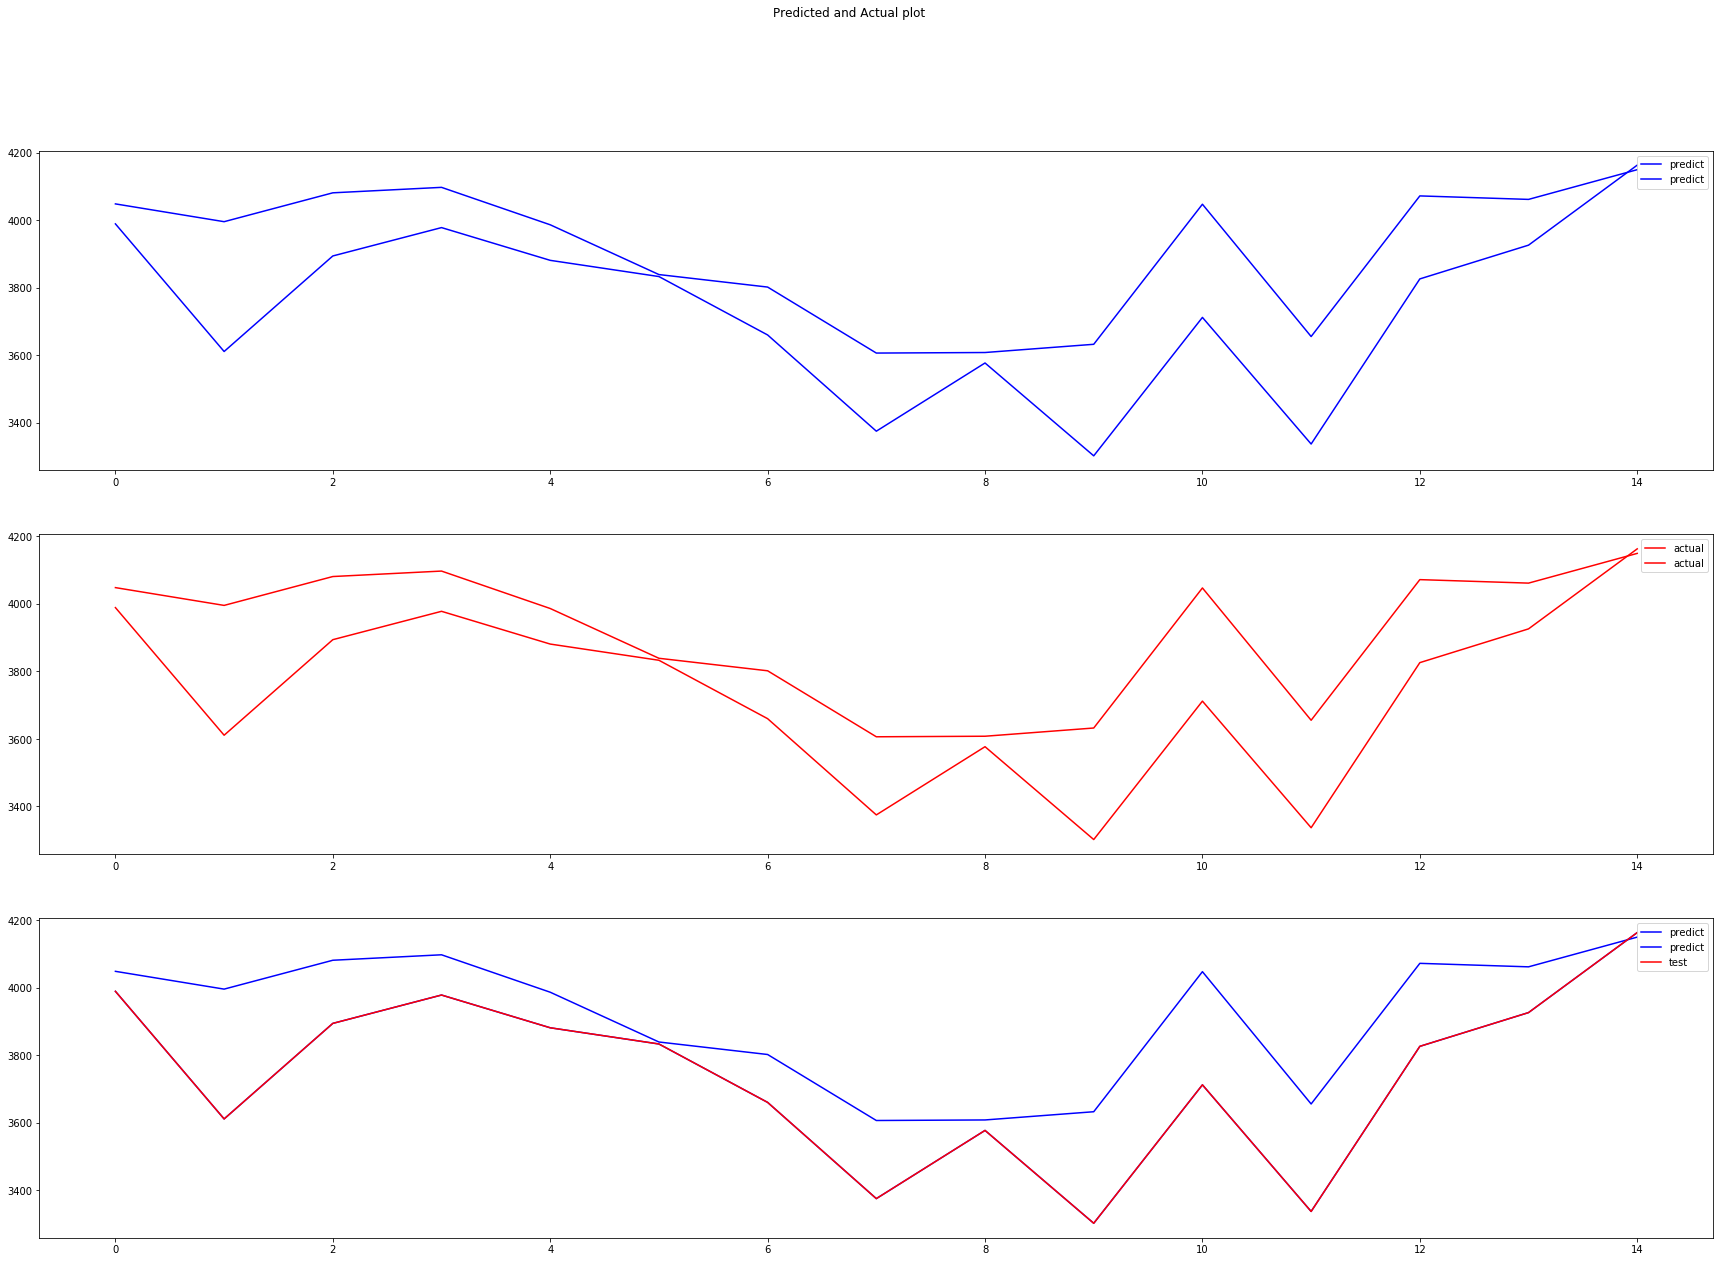

In [17]:
visualization(df_com_pred)

# Residential Sector

In [18]:
# read the dataset from csv
residential_merged_dataset = pd.read_csv("Residential_regression_Merged-Dataset.csv")

In [19]:
pa_residential_data = residential_merged_dataset.loc[residential_merged_dataset['PA'] == 1]
pa_residential_data = pa_residential_data.drop(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY', 'TAVG', 'area', 'Coal', 'Geothermal',
       'Hydroelectric Conventional', 'Natural Gas', 'Nuclear', 'Other',
       'Other Biomass', 'Other Gases', 'Petroleum', 'Pumped Storage',
       'Solar Thermal and Photovoltaic', 'Total', 'Wind',
       'Wood and Wood Derived Fuels',], axis=1)


In [20]:
pa_residential_data.columns

Index(['Year', 'Month', 'Cents/kWh', 'Year_Month', 'CLDD', 'AWND', 'HTDD',
       'PA', 'residential_usage', 'Population', 'solar-generation',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [21]:
#split the data first

r_train, r_test = train_test_split(pa_residential_data, test_size=0.2)

X_train_r = r_train.drop(['Year', 'Month', 'Year_Month', 'PA', 
                          'residential_usage', 'Season_Spring'], axis = 1)

y_train_r = r_train['residential_usage']

X_test_r = r_test.drop(['Year', 'Month', 'Year_Month', 'PA',
                        'residential_usage', 'Season_Spring'], axis = 1)
y_test_r = r_test['residential_usage']



In [22]:
# scale the data
numeric_feature_name = ['Cents/kWh','CLDD', 'AWND', 'HTDD', 
                        'Population', 'solar-generation']

categorical_feature_name = ['Year', 'Month', 'Season_Summer', 'Season_Fall', 'Season_Winter']


# scale the train and test data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_r[numeric_feature_name] = min_max_scaler.fit_transform(X_train_r[numeric_feature_name])
X_test_r[numeric_feature_name] = min_max_scaler.transform(X_test_r[numeric_feature_name])

y_train_r = (y_train_r - min(y_train_r))/(max(y_train_r) - min(y_train_r))

In [23]:
X_train_r

,Cents/kWh,CLDD,AWND,HTDD,Population,solar-generation,Season_Fall,Season_Summer,Season_Winter
2837,0.565445,0.498868,0.097407,0.048255,0.939572,0.500000,1,0,0
1237,0.534031,0.000000,0.716459,0.866204,0.000000,0.038462,0,0,1
1037,0.743455,0.425515,0.046685,0.039913,0.097704,0.115385,1,0,0
3137,0.486911,0.000108,0.697811,0.666146,0.965490,0.653846,0,0,0
2637,0.863874,0.273994,0.245286,0.066097,0.922341,0.653846,0,0,0
2037,0.984293,0.103333,0.551549,0.180663,0.475319,0.423077,0,0,0
637,0.036649,0.000000,0.735884,0.931308,0.123817,0.000000,0,0,1
237,0.267016,0.121152,0.324851,0.146397,0.236665,0.153846,0,0,0
2937,0.664921,0.000241,0.676801,0.590576,0.948211,0.230769,1,0,0
1287,0.617801,0.000000,0.763857,0.703720,0.021696,0.076923,0,0,1


# Residential_ANN

In [24]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Fitting the ANN to the training set
classifier.fit(X_train_r, y_train_r, validation_split=0.2, batch_size = 10, epochs = 1200)


Train on 45 samples, validate on 12 samples
Epoch 1/1200
45/45 [==============================] - 1s 18ms/sample - loss: 0.0782 - mae: 0.2398 - val_loss: 0.0973 - val_mae: 0.2813
Epoch 2/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0779 - mae: 0.2396 - val_loss: 0.0971 - val_mae: 0.2811
Epoch 3/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0775 - mae: 0.2392 - val_loss: 0.0969 - val_mae: 0.2810
Epoch 4/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0771 - mae: 0.2387 - val_loss: 0.0966 - val_mae: 0.2809
Epoch 5/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0767 - mae: 0.2383 - val_loss: 0.0963 - val_mae: 0.2807
Epoch 6/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0762 - mae: 0.2376 - val_loss: 0.0960 - val_mae: 0.2805
Epoch 7/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0756 - mae: 0.2369 - val_loss: 0.0955 - val_mae: 0.2803
Epoch

45/45 [==============================] - 0s 462us/sample - loss: 0.0324 - mae: 0.1473 - val_loss: 0.0486 - val_mae: 0.1800
Epoch 60/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0320 - mae: 0.1464 - val_loss: 0.0483 - val_mae: 0.1791
Epoch 61/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0318 - mae: 0.1456 - val_loss: 0.0478 - val_mae: 0.1776
Epoch 62/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0315 - mae: 0.1447 - val_loss: 0.0475 - val_mae: 0.1766
Epoch 63/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0313 - mae: 0.1440 - val_loss: 0.0472 - val_mae: 0.1764
Epoch 64/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0311 - mae: 0.1435 - val_loss: 0.0468 - val_mae: 0.1751
Epoch 65/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0307 - mae: 0.1424 - val_loss: 0.0466 - val_mae: 0.1752
Epoch 66/1200
45/45 [==============================] - 

Epoch 119/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0187 - mae: 0.1048 - val_loss: 0.0311 - val_mae: 0.1321
Epoch 120/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0185 - mae: 0.1043 - val_loss: 0.0308 - val_mae: 0.1314
Epoch 121/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0184 - mae: 0.1039 - val_loss: 0.0307 - val_mae: 0.1311
Epoch 122/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0183 - mae: 0.1033 - val_loss: 0.0305 - val_mae: 0.1307
Epoch 123/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0181 - mae: 0.1023 - val_loss: 0.0300 - val_mae: 0.1282
Epoch 124/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0180 - mae: 0.1010 - val_loss: 0.0296 - val_mae: 0.1259
Epoch 125/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0179 - mae: 0.1003 - val_loss: 0.0296 - val_mae: 0.1266
Epoch 126/1200
45/45 [============

45/45 [==============================] - 0s 464us/sample - loss: 0.0127 - mae: 0.0783 - val_loss: 0.0231 - val_mae: 0.1069
Epoch 179/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0126 - mae: 0.0778 - val_loss: 0.0231 - val_mae: 0.1074
Epoch 180/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0126 - mae: 0.0779 - val_loss: 0.0231 - val_mae: 0.1077
Epoch 181/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0125 - mae: 0.0774 - val_loss: 0.0229 - val_mae: 0.1068
Epoch 182/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0124 - mae: 0.0770 - val_loss: 0.0227 - val_mae: 0.1054
Epoch 183/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0124 - mae: 0.0769 - val_loss: 0.0223 - val_mae: 0.1029
Epoch 184/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0123 - mae: 0.0775 - val_loss: 0.0221 - val_mae: 0.1020
Epoch 185/1200
45/45 [===========================

45/45 [==============================] - 0s 466us/sample - loss: 0.0097 - mae: 0.0671 - val_loss: 0.0182 - val_mae: 0.0881
Epoch 238/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0096 - mae: 0.0667 - val_loss: 0.0185 - val_mae: 0.0902
Epoch 239/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0096 - mae: 0.0665 - val_loss: 0.0185 - val_mae: 0.0910
Epoch 240/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0095 - mae: 0.0665 - val_loss: 0.0184 - val_mae: 0.0904
Epoch 241/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0095 - mae: 0.0663 - val_loss: 0.0182 - val_mae: 0.0886
Epoch 242/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0095 - mae: 0.0663 - val_loss: 0.0179 - val_mae: 0.0869
Epoch 243/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0094 - mae: 0.0662 - val_loss: 0.0181 - val_mae: 0.0882
Epoch 244/1200
45/45 [===========================

45/45 [==============================] - 0s 442us/sample - loss: 0.0079 - mae: 0.0598 - val_loss: 0.0147 - val_mae: 0.0775
Epoch 297/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0079 - mae: 0.0598 - val_loss: 0.0147 - val_mae: 0.0775
Epoch 298/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0078 - mae: 0.0596 - val_loss: 0.0146 - val_mae: 0.0770
Epoch 299/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0078 - mae: 0.0595 - val_loss: 0.0144 - val_mae: 0.0764
Epoch 300/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0079 - mae: 0.0600 - val_loss: 0.0144 - val_mae: 0.0764
Epoch 301/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0078 - mae: 0.0596 - val_loss: 0.0145 - val_mae: 0.0769
Epoch 302/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0078 - mae: 0.0594 - val_loss: 0.0148 - val_mae: 0.0782
Epoch 303/1200
45/45 [===========================

45/45 [==============================] - 0s 465us/sample - loss: 0.0066 - mae: 0.0551 - val_loss: 0.0134 - val_mae: 0.0748
Epoch 356/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0066 - mae: 0.0547 - val_loss: 0.0135 - val_mae: 0.0751
Epoch 357/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0066 - mae: 0.0552 - val_loss: 0.0136 - val_mae: 0.0762
Epoch 358/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0066 - mae: 0.0555 - val_loss: 0.0136 - val_mae: 0.0767
Epoch 359/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0066 - mae: 0.0550 - val_loss: 0.0134 - val_mae: 0.0747
Epoch 360/1200
45/45 [==============================] - 0s 489us/sample - loss: 0.0066 - mae: 0.0552 - val_loss: 0.0134 - val_mae: 0.0750
Epoch 361/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0067 - mae: 0.0556 - val_loss: 0.0133 - val_mae: 0.0758
Epoch 362/1200
45/45 [===========================

Epoch 414/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0058 - mae: 0.0538 - val_loss: 0.0122 - val_mae: 0.0742
Epoch 415/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0058 - mae: 0.0537 - val_loss: 0.0122 - val_mae: 0.0747
Epoch 416/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0059 - mae: 0.0543 - val_loss: 0.0121 - val_mae: 0.0746
Epoch 417/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0059 - mae: 0.0545 - val_loss: 0.0122 - val_mae: 0.0741
Epoch 418/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0058 - mae: 0.0539 - val_loss: 0.0124 - val_mae: 0.0760
Epoch 419/1200
45/45 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.039 - 0s 487us/sample - loss: 0.0058 - mae: 0.0543 - val_loss: 0.0124 - val_mae: 0.0763
Epoch 420/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0058 - mae: 0.0540 - val_loss: 0.0124 - val_mae: 0.0

Epoch 473/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0054 - mae: 0.0539 - val_loss: 0.0115 - val_mae: 0.0740
Epoch 474/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0054 - mae: 0.0540 - val_loss: 0.0115 - val_mae: 0.0742
Epoch 475/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0054 - mae: 0.0537 - val_loss: 0.0114 - val_mae: 0.0727
Epoch 476/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0054 - mae: 0.0533 - val_loss: 0.0114 - val_mae: 0.0728
Epoch 477/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0054 - mae: 0.0531 - val_loss: 0.0114 - val_mae: 0.0734
Epoch 478/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0054 - mae: 0.0534 - val_loss: 0.0114 - val_mae: 0.0740
Epoch 479/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0054 - mae: 0.0537 - val_loss: 0.0114 - val_mae: 0.0740
Epoch 480/1200
45/45 [============

45/45 [==============================] - 0s 465us/sample - loss: 0.0051 - mae: 0.0533 - val_loss: 0.0110 - val_mae: 0.0731
Epoch 533/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0051 - mae: 0.0533 - val_loss: 0.0110 - val_mae: 0.0727
Epoch 534/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0051 - mae: 0.0533 - val_loss: 0.0109 - val_mae: 0.0724
Epoch 535/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0051 - mae: 0.0537 - val_loss: 0.0110 - val_mae: 0.0738
Epoch 536/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0051 - mae: 0.0537 - val_loss: 0.0109 - val_mae: 0.0726
Epoch 537/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0052 - mae: 0.0537 - val_loss: 0.0108 - val_mae: 0.0726
Epoch 538/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0052 - mae: 0.0536 - val_loss: 0.0107 - val_mae: 0.0708
Epoch 539/1200
45/45 [===========================

45/45 [==============================] - 0s 466us/sample - loss: 0.0050 - mae: 0.0535 - val_loss: 0.0104 - val_mae: 0.0717
Epoch 592/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0050 - mae: 0.0534 - val_loss: 0.0105 - val_mae: 0.0711
Epoch 593/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0050 - mae: 0.0540 - val_loss: 0.0107 - val_mae: 0.0734
Epoch 594/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0049 - mae: 0.0533 - val_loss: 0.0107 - val_mae: 0.0729
Epoch 595/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0049 - mae: 0.0532 - val_loss: 0.0107 - val_mae: 0.0730
Epoch 596/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0050 - mae: 0.0540 - val_loss: 0.0106 - val_mae: 0.0731
Epoch 597/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0049 - mae: 0.0533 - val_loss: 0.0104 - val_mae: 0.0706
Epoch 598/1200
45/45 [===========================

45/45 [==============================] - 0s 443us/sample - loss: 0.0048 - mae: 0.0528 - val_loss: 0.0106 - val_mae: 0.0731
Epoch 651/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0048 - mae: 0.0528 - val_loss: 0.0105 - val_mae: 0.0728
Epoch 652/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0048 - mae: 0.0528 - val_loss: 0.0106 - val_mae: 0.0728
Epoch 653/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0048 - mae: 0.0530 - val_loss: 0.0105 - val_mae: 0.0716
Epoch 654/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0049 - mae: 0.0534 - val_loss: 0.0105 - val_mae: 0.0731
Epoch 655/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0049 - mae: 0.0536 - val_loss: 0.0104 - val_mae: 0.0713
Epoch 656/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0048 - mae: 0.0526 - val_loss: 0.0105 - val_mae: 0.0727
Epoch 657/1200
45/45 [===========================

45/45 [==============================] - 0s 443us/sample - loss: 0.0047 - mae: 0.0527 - val_loss: 0.0105 - val_mae: 0.0728
Epoch 710/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0047 - mae: 0.0531 - val_loss: 0.0105 - val_mae: 0.0734
Epoch 711/1200
45/45 [==============================] - 0s 463us/sample - loss: 0.0047 - mae: 0.0527 - val_loss: 0.0104 - val_mae: 0.0726
Epoch 712/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0047 - mae: 0.0525 - val_loss: 0.0104 - val_mae: 0.0717
Epoch 713/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0047 - mae: 0.0527 - val_loss: 0.0105 - val_mae: 0.0729
Epoch 714/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0047 - mae: 0.0526 - val_loss: 0.0104 - val_mae: 0.0728
Epoch 715/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0047 - mae: 0.0528 - val_loss: 0.0105 - val_mae: 0.0740
Epoch 716/1200
45/45 [===========================

45/45 [==============================] - 0s 531us/sample - loss: 0.0047 - mae: 0.0534 - val_loss: 0.0113 - val_mae: 0.0791
Epoch 769/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0047 - mae: 0.0527 - val_loss: 0.0107 - val_mae: 0.0738
Epoch 770/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0046 - mae: 0.0530 - val_loss: 0.0107 - val_mae: 0.0732
Epoch 771/1200
45/45 [==============================] - 0s 531us/sample - loss: 0.0046 - mae: 0.0526 - val_loss: 0.0106 - val_mae: 0.0737
Epoch 772/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0046 - mae: 0.0523 - val_loss: 0.0106 - val_mae: 0.0745
Epoch 773/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0046 - mae: 0.0524 - val_loss: 0.0105 - val_mae: 0.0741
Epoch 774/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0046 - mae: 0.0520 - val_loss: 0.0105 - val_mae: 0.0731
Epoch 775/1200
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0045 - mae: 0.0518 - val_loss: 0.0110 - val_mae: 0.0766
Epoch 828/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0045 - mae: 0.0519 - val_loss: 0.0112 - val_mae: 0.0779
Epoch 829/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0045 - mae: 0.0525 - val_loss: 0.0110 - val_mae: 0.0770
Epoch 830/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0045 - mae: 0.0519 - val_loss: 0.0108 - val_mae: 0.0752
Epoch 831/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0045 - mae: 0.0517 - val_loss: 0.0109 - val_mae: 0.0761
Epoch 832/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0044 - mae: 0.0515 - val_loss: 0.0112 - val_mae: 0.0774
Epoch 833/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0045 - mae: 0.0519 - val_loss: 0.0110 - val_mae: 0.0767
Epoch 834/1200
45/45 [===========================

45/45 [==============================] - 0s 466us/sample - loss: 0.0044 - mae: 0.0507 - val_loss: 0.0111 - val_mae: 0.0757
Epoch 887/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0044 - mae: 0.0503 - val_loss: 0.0112 - val_mae: 0.0769
Epoch 888/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0044 - mae: 0.0509 - val_loss: 0.0114 - val_mae: 0.0776
Epoch 889/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0044 - mae: 0.0506 - val_loss: 0.0112 - val_mae: 0.0766
Epoch 890/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0044 - mae: 0.0508 - val_loss: 0.0115 - val_mae: 0.0780
Epoch 891/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0044 - mae: 0.0508 - val_loss: 0.0115 - val_mae: 0.0775
Epoch 892/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0044 - mae: 0.0504 - val_loss: 0.0114 - val_mae: 0.0768
Epoch 893/1200
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0043 - mae: 0.0500 - val_loss: 0.0124 - val_mae: 0.0802
Epoch 946/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0043 - mae: 0.0500 - val_loss: 0.0125 - val_mae: 0.0807
Epoch 947/1200
45/45 [==============================] - 0s 486us/sample - loss: 0.0043 - mae: 0.0501 - val_loss: 0.0126 - val_mae: 0.0810
Epoch 948/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0044 - mae: 0.0511 - val_loss: 0.0122 - val_mae: 0.0781
Epoch 949/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0043 - mae: 0.0506 - val_loss: 0.0123 - val_mae: 0.0797
Epoch 950/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0043 - mae: 0.0505 - val_loss: 0.0130 - val_mae: 0.0835
Epoch 951/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0043 - mae: 0.0512 - val_loss: 0.0124 - val_mae: 0.0805
Epoch 952/1200
45/45 [===========================

45/45 [==============================] - 0s 554us/sample - loss: 0.0042 - mae: 0.0490 - val_loss: 0.0127 - val_mae: 0.0797
Epoch 1005/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0042 - mae: 0.0484 - val_loss: 0.0124 - val_mae: 0.0776
Epoch 1006/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0042 - mae: 0.0485 - val_loss: 0.0124 - val_mae: 0.0781
Epoch 1007/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0042 - mae: 0.0483 - val_loss: 0.0128 - val_mae: 0.0799
Epoch 1008/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0042 - mae: 0.0485 - val_loss: 0.0130 - val_mae: 0.0811
Epoch 1009/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0042 - mae: 0.0485 - val_loss: 0.0128 - val_mae: 0.0798
Epoch 1010/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0042 - mae: 0.0484 - val_loss: 0.0126 - val_mae: 0.0781
Epoch 1011/1200
45/45 [====================

45/45 [==============================] - 0s 465us/sample - loss: 0.0040 - mae: 0.0467 - val_loss: 0.0140 - val_mae: 0.0829
Epoch 1064/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0041 - mae: 0.0470 - val_loss: 0.0137 - val_mae: 0.0810
Epoch 1065/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0041 - mae: 0.0469 - val_loss: 0.0137 - val_mae: 0.0817
Epoch 1066/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0041 - mae: 0.0474 - val_loss: 0.0139 - val_mae: 0.0831
Epoch 1067/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0041 - mae: 0.0465 - val_loss: 0.0137 - val_mae: 0.0817
Epoch 1068/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0041 - mae: 0.0467 - val_loss: 0.0138 - val_mae: 0.0817
Epoch 1069/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0041 - mae: 0.0474 - val_loss: 0.0140 - val_mae: 0.0834
Epoch 1070/1200
45/45 [====================

45/45 [==============================] - 0s 509us/sample - loss: 0.0040 - mae: 0.0461 - val_loss: 0.0139 - val_mae: 0.0826
Epoch 1123/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0040 - mae: 0.0463 - val_loss: 0.0138 - val_mae: 0.0824
Epoch 1124/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0040 - mae: 0.0464 - val_loss: 0.0137 - val_mae: 0.0812
Epoch 1125/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0040 - mae: 0.0458 - val_loss: 0.0137 - val_mae: 0.0818
Epoch 1126/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0040 - mae: 0.0461 - val_loss: 0.0137 - val_mae: 0.0821
Epoch 1127/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0040 - mae: 0.0458 - val_loss: 0.0138 - val_mae: 0.0822
Epoch 1128/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0040 - mae: 0.0460 - val_loss: 0.0139 - val_mae: 0.0822
Epoch 1129/1200
45/45 [====================

Epoch 1181/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0040 - mae: 0.0464 - val_loss: 0.0136 - val_mae: 0.0818
Epoch 1182/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0039 - mae: 0.0458 - val_loss: 0.0137 - val_mae: 0.0819
Epoch 1183/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0039 - mae: 0.0459 - val_loss: 0.0139 - val_mae: 0.0826
Epoch 1184/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0040 - mae: 0.0460 - val_loss: 0.0138 - val_mae: 0.0815
Epoch 1185/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0041 - mae: 0.0473 - val_loss: 0.0137 - val_mae: 0.0822
Epoch 1186/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0040 - mae: 0.0464 - val_loss: 0.0133 - val_mae: 0.0798
Epoch 1187/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0039 - mae: 0.0455 - val_loss: 0.0133 - val_mae: 0.0801
Epoch 1188/1200
45/45 [====

In [25]:
# Predicting the Test set results
r_predictions = classifier.predict(X_test_r)
# Scale y back 
r_predictions = (r_predictions * (max(y_test_r) - min(y_test_r))) + min(y_test_r)
r_predictions = r_predictions.reshape(-1)
df_res_pred = pd.DataFrame({'Actual': y_test_r, 'Predicted': r_predictions})

In [26]:
r_predictions

array([3796.8477, 4465.216 , 4409.7456, 4693.716 , 3557.7422, 4824.7793,
       4567.9824, 4744.1123, 3598.7412, 5109.8906, 5053.3145, 4194.0923,
       4984.963 , 3607.6792, 3835.4707], dtype=float32)

Mean Absolute Error: 247.99508463541667
Mean Squared Error: 87954.80658052763
Root Mean Squared Error: 296.5717562083882


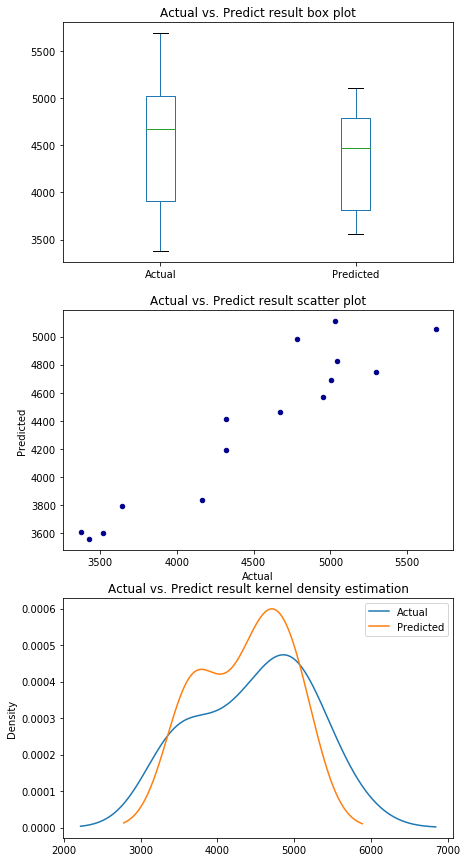

In [27]:
evaluate_performances(y_test_r, r_predictions)

#visualize
visualize_graph(df_res_pred)

In [28]:
# Visualization
def visualization_r(y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_pred)),y_pred,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_pred)),y_test_r,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

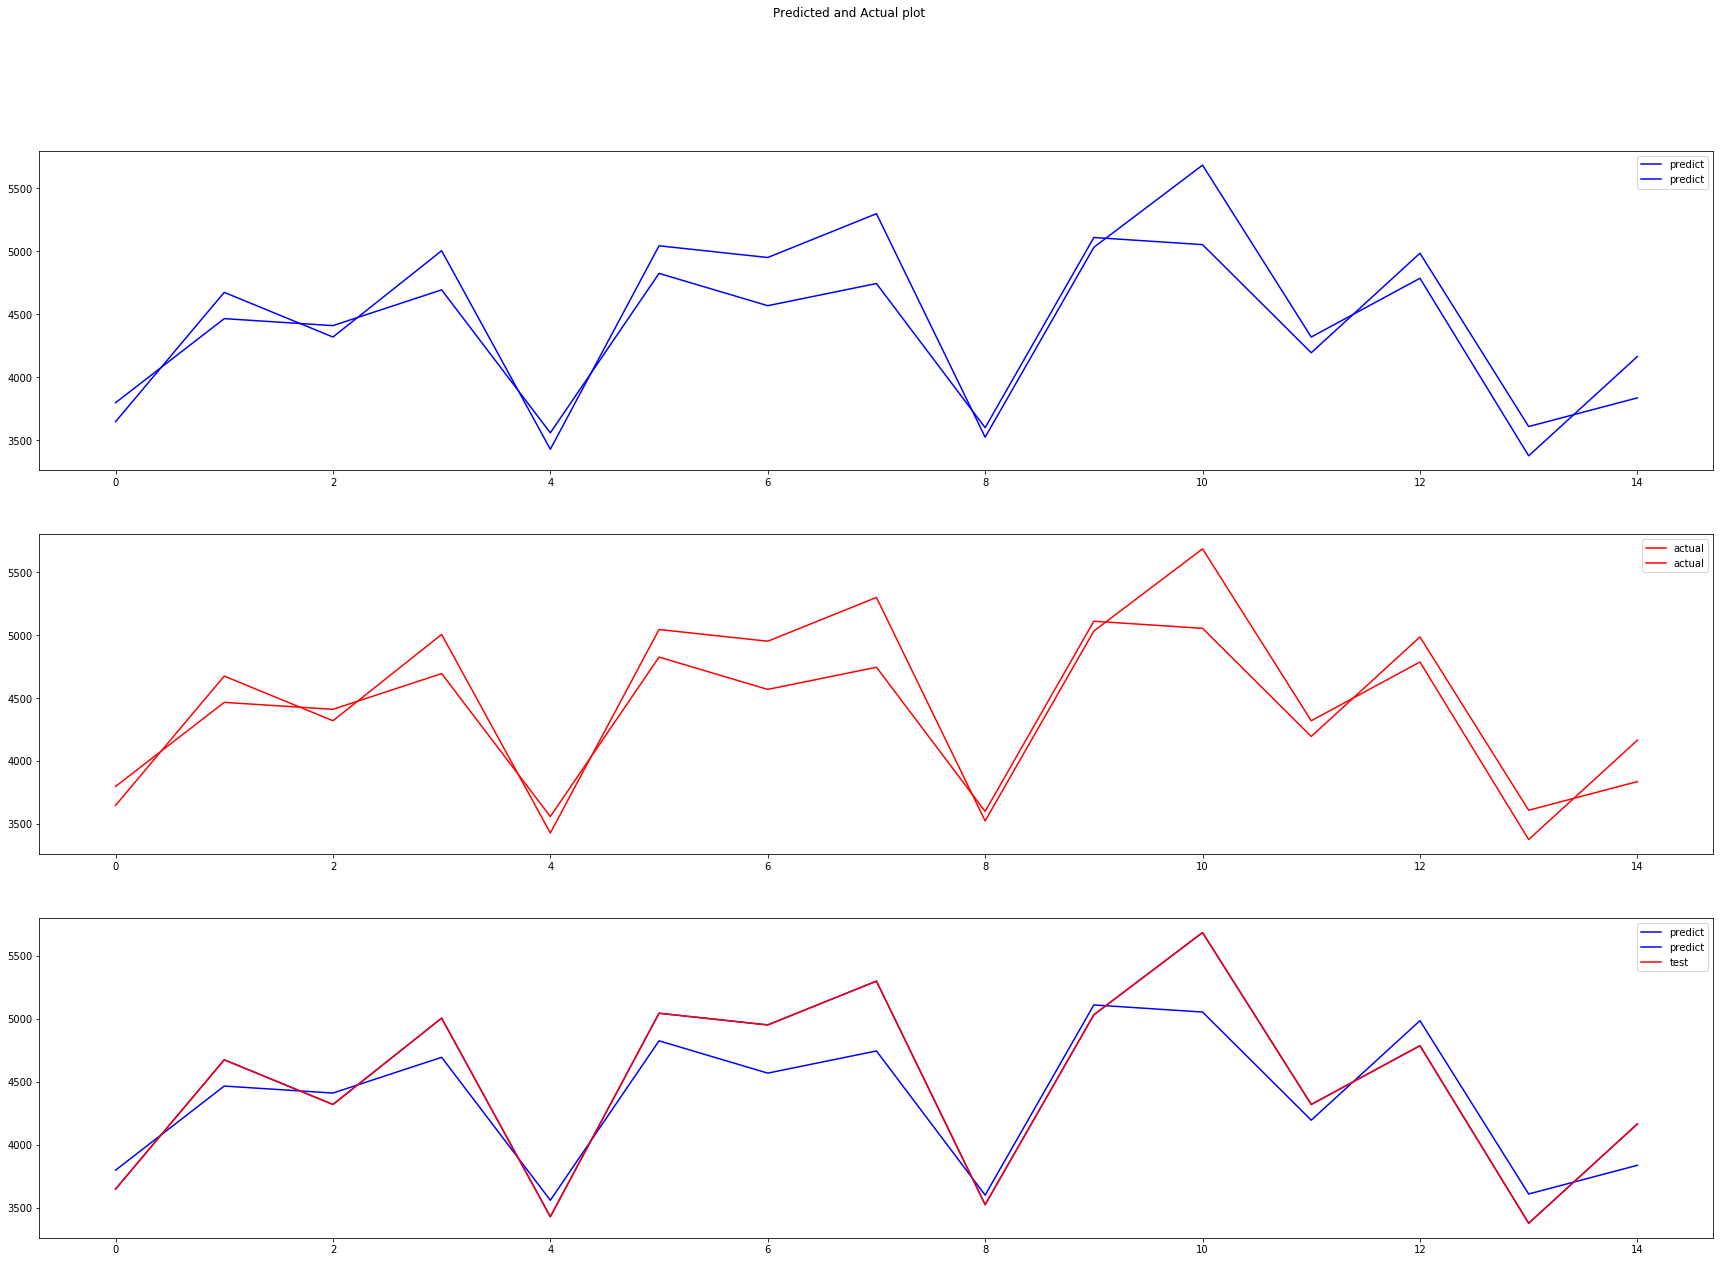

In [29]:
visualization_r(df_res_pred)

# Industrial Sector

In [30]:
# read in the dataset
ind_merged_dataset = pd.read_csv("Industrial_regr.csv")

In [31]:
pa_ind_data = ind_merged_dataset.loc[ind_merged_dataset['PA'] == 1]

pa_ind_data = pa_ind_data.drop(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY', 'TAVG', 'area', 'Total'], axis=1)

In [32]:
pa_ind_data.columns

Index(['Year', 'Month', 'Cents/kWh', 'CLDD', 'AWND', 'HTDD', 'PA',
       'industrial_usage', 'Population', 'solar-generation', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [33]:
#split the data first

i_train, i_test = train_test_split(pa_ind_data, test_size=0.2)

X_train_i = i_train.drop(['Year', 'Month', 'PA', 
                          'industrial_usage', 'Season_Spring'], axis = 1)

y_train_i = i_train['industrial_usage']

X_test_i = i_test.drop(['Year', 'Month', 'PA',
                        'industrial_usage', 'Season_Spring'], axis = 1)
y_test_i = i_test['industrial_usage']

In [34]:
# scale the data
numeric_feature_name = ['Cents/kWh','CLDD', 'AWND', 'HTDD', 
                        'Population', 'solar-generation']

categorical_feature_name = ['Year', 'Month', 'Season_Summer', 'Season_Fall', 'Season_Winter']


# scale the train and test data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_i[numeric_feature_name] = min_max_scaler.fit_transform(X_train_i[numeric_feature_name])
X_test_i[numeric_feature_name] = min_max_scaler.transform(X_test_i[numeric_feature_name])

y_train_i = (y_train_i - min(y_train_i))/(max(y_train_i) - min(y_train_i))

# Industrial_ANN

In [35]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))

# # Adding the second hidden layer
# classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Fitting the ANN to the training set
classifier.fit(X_train_i, y_train_i, validation_split=0.2, batch_size = 10, epochs = 1200)

Train on 45 samples, validate on 12 samples
Epoch 1/1200
45/45 [==============================] - 1s 13ms/sample - loss: 0.0554 - mae: 0.2025 - val_loss: 0.0390 - val_mae: 0.1643
Epoch 2/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0547 - mae: 0.2008 - val_loss: 0.0387 - val_mae: 0.1635
Epoch 3/1200
45/45 [==============================] - 0s 420us/sample - loss: 0.0539 - mae: 0.1993 - val_loss: 0.0383 - val_mae: 0.1625
Epoch 4/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0533 - mae: 0.1977 - val_loss: 0.0379 - val_mae: 0.1614
Epoch 5/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0523 - mae: 0.1957 - val_loss: 0.0373 - val_mae: 0.1600
Epoch 6/1200
45/45 [==============================] - 0s 577us/sample - loss: 0.0513 - mae: 0.1935 - val_loss: 0.0367 - val_mae: 0.1583
Epoch 7/1200
45/45 [==============================] - 0s 421us/sample - loss: 0.0503 - mae: 0.1907 - val_loss: 0.0361 - val_mae: 0.1569
Epoch

45/45 [==============================] - 0s 687us/sample - loss: 0.0177 - mae: 0.0977 - val_loss: 0.0195 - val_mae: 0.1145
Epoch 60/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0175 - mae: 0.0974 - val_loss: 0.0194 - val_mae: 0.1142
Epoch 61/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0174 - mae: 0.0972 - val_loss: 0.0193 - val_mae: 0.1139
Epoch 62/1200
45/45 [==============================] - 0s 665us/sample - loss: 0.0172 - mae: 0.0969 - val_loss: 0.0193 - val_mae: 0.1139
Epoch 63/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0171 - mae: 0.0966 - val_loss: 0.0193 - val_mae: 0.1137
Epoch 64/1200
45/45 [==============================] - 0s 665us/sample - loss: 0.0170 - mae: 0.0963 - val_loss: 0.0192 - val_mae: 0.1132
Epoch 65/1200
45/45 [==============================] - 0s 709us/sample - loss: 0.0169 - mae: 0.0959 - val_loss: 0.0192 - val_mae: 0.1130
Epoch 66/1200
45/45 [==============================] - 

Epoch 119/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0133 - mae: 0.0870 - val_loss: 0.0182 - val_mae: 0.1098
Epoch 120/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0133 - mae: 0.0869 - val_loss: 0.0182 - val_mae: 0.1096
Epoch 121/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0133 - mae: 0.0868 - val_loss: 0.0182 - val_mae: 0.1096
Epoch 122/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0132 - mae: 0.0866 - val_loss: 0.0183 - val_mae: 0.1098
Epoch 123/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0132 - mae: 0.0864 - val_loss: 0.0183 - val_mae: 0.1099
Epoch 124/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0132 - mae: 0.0864 - val_loss: 0.0183 - val_mae: 0.1097
Epoch 125/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0131 - mae: 0.0864 - val_loss: 0.0183 - val_mae: 0.1096
Epoch 126/1200
45/45 [============

45/45 [==============================] - 0s 488us/sample - loss: 0.0119 - mae: 0.0825 - val_loss: 0.0181 - val_mae: 0.1099
Epoch 179/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0119 - mae: 0.0823 - val_loss: 0.0181 - val_mae: 0.1094
Epoch 180/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0119 - mae: 0.0821 - val_loss: 0.0180 - val_mae: 0.1098
Epoch 181/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0119 - mae: 0.0823 - val_loss: 0.0180 - val_mae: 0.1098
Epoch 182/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0118 - mae: 0.0819 - val_loss: 0.0179 - val_mae: 0.1093
Epoch 183/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0118 - mae: 0.0819 - val_loss: 0.0178 - val_mae: 0.1086
Epoch 184/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0118 - mae: 0.0818 - val_loss: 0.0177 - val_mae: 0.1082
Epoch 185/1200
45/45 [===========================

45/45 [==============================] - 0s 421us/sample - loss: 0.0109 - mae: 0.0787 - val_loss: 0.0171 - val_mae: 0.1077
Epoch 238/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0109 - mae: 0.0787 - val_loss: 0.0170 - val_mae: 0.1074
Epoch 239/1200
45/45 [==============================] - 0s 421us/sample - loss: 0.0109 - mae: 0.0784 - val_loss: 0.0168 - val_mae: 0.1066
Epoch 240/1200
45/45 [==============================] - 0s 420us/sample - loss: 0.0109 - mae: 0.0784 - val_loss: 0.0167 - val_mae: 0.1058
Epoch 241/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0108 - mae: 0.0780 - val_loss: 0.0168 - val_mae: 0.1060
Epoch 242/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0108 - mae: 0.0780 - val_loss: 0.0168 - val_mae: 0.1065
Epoch 243/1200
45/45 [==============================] - 0s 421us/sample - loss: 0.0108 - mae: 0.0783 - val_loss: 0.0169 - val_mae: 0.1072
Epoch 244/1200
45/45 [===========================

45/45 [==============================] - 0s 554us/sample - loss: 0.0102 - mae: 0.0753 - val_loss: 0.0166 - val_mae: 0.1049
Epoch 297/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0102 - mae: 0.0755 - val_loss: 0.0168 - val_mae: 0.1053
Epoch 298/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0102 - mae: 0.0756 - val_loss: 0.0168 - val_mae: 0.1054
Epoch 299/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0102 - mae: 0.0754 - val_loss: 0.0167 - val_mae: 0.1050
Epoch 300/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0102 - mae: 0.0752 - val_loss: 0.0167 - val_mae: 0.1050
Epoch 301/1200
45/45 [==============================] - 0s 621us/sample - loss: 0.0102 - mae: 0.0751 - val_loss: 0.0166 - val_mae: 0.1045
Epoch 302/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0102 - mae: 0.0752 - val_loss: 0.0167 - val_mae: 0.1050
Epoch 303/1200
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0097 - mae: 0.0731 - val_loss: 0.0161 - val_mae: 0.1024
Epoch 356/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0097 - mae: 0.0731 - val_loss: 0.0161 - val_mae: 0.1026
Epoch 357/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0097 - mae: 0.0731 - val_loss: 0.0162 - val_mae: 0.1027
Epoch 358/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0097 - mae: 0.0730 - val_loss: 0.0161 - val_mae: 0.1026
Epoch 359/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0097 - mae: 0.0728 - val_loss: 0.0161 - val_mae: 0.1028
Epoch 360/1200
45/45 [==============================] - 0s 599us/sample - loss: 0.0097 - mae: 0.0730 - val_loss: 0.0162 - val_mae: 0.1030
Epoch 361/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0097 - mae: 0.0729 - val_loss: 0.0160 - val_mae: 0.1029
Epoch 362/1200
45/45 [===========================

45/45 [==============================] - 0s 465us/sample - loss: 0.0093 - mae: 0.0713 - val_loss: 0.0155 - val_mae: 0.1006
Epoch 415/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0093 - mae: 0.0715 - val_loss: 0.0154 - val_mae: 0.1008
Epoch 416/1200
45/45 [==============================] - 0s 421us/sample - loss: 0.0093 - mae: 0.0712 - val_loss: 0.0154 - val_mae: 0.1007
Epoch 417/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0093 - mae: 0.0713 - val_loss: 0.0153 - val_mae: 0.1003
Epoch 418/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0093 - mae: 0.0710 - val_loss: 0.0154 - val_mae: 0.1002
Epoch 419/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0093 - mae: 0.0710 - val_loss: 0.0157 - val_mae: 0.1006
Epoch 420/1200
45/45 [==============================] - 0s 576us/sample - loss: 0.0093 - mae: 0.0714 - val_loss: 0.0157 - val_mae: 0.1007
Epoch 421/1200
45/45 [===========================

45/45 [==============================] - 0s 487us/sample - loss: 0.0090 - mae: 0.0703 - val_loss: 0.0149 - val_mae: 0.0985
Epoch 474/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0090 - mae: 0.0704 - val_loss: 0.0151 - val_mae: 0.0989
Epoch 475/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0090 - mae: 0.0703 - val_loss: 0.0151 - val_mae: 0.0988
Epoch 476/1200
45/45 [==============================] - 0s 489us/sample - loss: 0.0090 - mae: 0.0705 - val_loss: 0.0151 - val_mae: 0.0985
Epoch 477/1200
45/45 [==============================] - 0s 464us/sample - loss: 0.0090 - mae: 0.0704 - val_loss: 0.0150 - val_mae: 0.0983
Epoch 478/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0089 - mae: 0.0701 - val_loss: 0.0148 - val_mae: 0.0978
Epoch 479/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0089 - mae: 0.0700 - val_loss: 0.0147 - val_mae: 0.0978
Epoch 480/1200
45/45 [===========================

45/45 [==============================] - 0s 687us/sample - loss: 0.0087 - mae: 0.0688 - val_loss: 0.0148 - val_mae: 0.0976
Epoch 533/1200
45/45 [==============================] - 0s 665us/sample - loss: 0.0087 - mae: 0.0686 - val_loss: 0.0148 - val_mae: 0.0976
Epoch 534/1200
45/45 [==============================] - 0s 643us/sample - loss: 0.0087 - mae: 0.0686 - val_loss: 0.0147 - val_mae: 0.0975
Epoch 535/1200
45/45 [==============================] - 0s 598us/sample - loss: 0.0087 - mae: 0.0687 - val_loss: 0.0150 - val_mae: 0.0984
Epoch 536/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0087 - mae: 0.0687 - val_loss: 0.0151 - val_mae: 0.0988
Epoch 537/1200
45/45 [==============================] - 0s 532us/sample - loss: 0.0087 - mae: 0.0689 - val_loss: 0.0152 - val_mae: 0.0991
Epoch 538/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0086 - mae: 0.0689 - val_loss: 0.0153 - val_mae: 0.0996
Epoch 539/1200
45/45 [===========================

45/45 [==============================] - 0s 443us/sample - loss: 0.0085 - mae: 0.0678 - val_loss: 0.0146 - val_mae: 0.0981
Epoch 592/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0085 - mae: 0.0678 - val_loss: 0.0146 - val_mae: 0.0980
Epoch 593/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0085 - mae: 0.0677 - val_loss: 0.0145 - val_mae: 0.0977
Epoch 594/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0084 - mae: 0.0675 - val_loss: 0.0146 - val_mae: 0.0981
Epoch 595/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0085 - mae: 0.0677 - val_loss: 0.0148 - val_mae: 0.0987
Epoch 596/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0084 - mae: 0.0679 - val_loss: 0.0152 - val_mae: 0.1004
Epoch 597/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0085 - mae: 0.0684 - val_loss: 0.0155 - val_mae: 0.1012
Epoch 598/1200
45/45 [===========================

45/45 [==============================] - 0s 466us/sample - loss: 0.0082 - mae: 0.0673 - val_loss: 0.0150 - val_mae: 0.1001
Epoch 651/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0082 - mae: 0.0669 - val_loss: 0.0149 - val_mae: 0.0997
Epoch 652/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0083 - mae: 0.0671 - val_loss: 0.0148 - val_mae: 0.0994
Epoch 653/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0082 - mae: 0.0667 - val_loss: 0.0145 - val_mae: 0.0982
Epoch 654/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0082 - mae: 0.0668 - val_loss: 0.0146 - val_mae: 0.0985
Epoch 655/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0082 - mae: 0.0668 - val_loss: 0.0148 - val_mae: 0.0992
Epoch 656/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0082 - mae: 0.0669 - val_loss: 0.0148 - val_mae: 0.0995
Epoch 657/1200
45/45 [===========================

45/45 [==============================] - 0s 466us/sample - loss: 0.0081 - mae: 0.0661 - val_loss: 0.0150 - val_mae: 0.1008
Epoch 710/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0080 - mae: 0.0661 - val_loss: 0.0151 - val_mae: 0.1014
Epoch 711/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0081 - mae: 0.0664 - val_loss: 0.0153 - val_mae: 0.1020
Epoch 712/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0081 - mae: 0.0668 - val_loss: 0.0154 - val_mae: 0.1024
Epoch 713/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0080 - mae: 0.0664 - val_loss: 0.0153 - val_mae: 0.1021
Epoch 714/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0081 - mae: 0.0663 - val_loss: 0.0150 - val_mae: 0.1009
Epoch 715/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0080 - mae: 0.0661 - val_loss: 0.0152 - val_mae: 0.1017
Epoch 716/1200
45/45 [===========================

45/45 [==============================] - 0s 510us/sample - loss: 0.0079 - mae: 0.0656 - val_loss: 0.0156 - val_mae: 0.1033
Epoch 769/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0079 - mae: 0.0655 - val_loss: 0.0154 - val_mae: 0.1029
Epoch 770/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0079 - mae: 0.0656 - val_loss: 0.0155 - val_mae: 0.1029
Epoch 771/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0078 - mae: 0.0654 - val_loss: 0.0153 - val_mae: 0.1023
Epoch 772/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0079 - mae: 0.0654 - val_loss: 0.0150 - val_mae: 0.1011
Epoch 773/1200
45/45 [==============================] - 0s 489us/sample - loss: 0.0079 - mae: 0.0652 - val_loss: 0.0149 - val_mae: 0.1006
Epoch 774/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0079 - mae: 0.0650 - val_loss: 0.0150 - val_mae: 0.1012
Epoch 775/1200
45/45 [===========================

45/45 [==============================] - 0s 465us/sample - loss: 0.0078 - mae: 0.0646 - val_loss: 0.0150 - val_mae: 0.1015
Epoch 828/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0077 - mae: 0.0641 - val_loss: 0.0154 - val_mae: 0.1030
Epoch 829/1200
45/45 [==============================] - 0s 487us/sample - loss: 0.0077 - mae: 0.0646 - val_loss: 0.0156 - val_mae: 0.1038
Epoch 830/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0078 - mae: 0.0655 - val_loss: 0.0158 - val_mae: 0.1042
Epoch 831/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0078 - mae: 0.0650 - val_loss: 0.0151 - val_mae: 0.1019
Epoch 832/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0077 - mae: 0.0643 - val_loss: 0.0150 - val_mae: 0.1014
Epoch 833/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0077 - mae: 0.0641 - val_loss: 0.0150 - val_mae: 0.1015
Epoch 834/1200
45/45 [===========================

45/45 [==============================] - 0s 488us/sample - loss: 0.0076 - mae: 0.0644 - val_loss: 0.0159 - val_mae: 0.1048
Epoch 887/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0076 - mae: 0.0646 - val_loss: 0.0158 - val_mae: 0.1045
Epoch 888/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0076 - mae: 0.0646 - val_loss: 0.0157 - val_mae: 0.1039
Epoch 889/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0075 - mae: 0.0639 - val_loss: 0.0153 - val_mae: 0.1028
Epoch 890/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0076 - mae: 0.0639 - val_loss: 0.0151 - val_mae: 0.1018
Epoch 891/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0076 - mae: 0.0638 - val_loss: 0.0152 - val_mae: 0.1022
Epoch 892/1200
45/45 [==============================] - 0s 510us/sample - loss: 0.0076 - mae: 0.0636 - val_loss: 0.0154 - val_mae: 0.1032
Epoch 893/1200
45/45 [===========================

45/45 [==============================] - 0s 444us/sample - loss: 0.0075 - mae: 0.0634 - val_loss: 0.0153 - val_mae: 0.1026
Epoch 946/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0075 - mae: 0.0633 - val_loss: 0.0156 - val_mae: 0.1038
Epoch 947/1200
45/45 [==============================] - 0s 533us/sample - loss: 0.0074 - mae: 0.0633 - val_loss: 0.0154 - val_mae: 0.1029
Epoch 948/1200
45/45 [==============================] - 0s 554us/sample - loss: 0.0075 - mae: 0.0631 - val_loss: 0.0150 - val_mae: 0.1016
Epoch 949/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0075 - mae: 0.0632 - val_loss: 0.0150 - val_mae: 0.1014
Epoch 950/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0074 - mae: 0.0630 - val_loss: 0.0151 - val_mae: 0.1017
Epoch 951/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0074 - mae: 0.0631 - val_loss: 0.0152 - val_mae: 0.1020
Epoch 952/1200
45/45 [===========================

45/45 [==============================] - 0s 444us/sample - loss: 0.0073 - mae: 0.0626 - val_loss: 0.0155 - val_mae: 0.1037
Epoch 1005/1200
45/45 [==============================] - 0s 420us/sample - loss: 0.0073 - mae: 0.0623 - val_loss: 0.0154 - val_mae: 0.1035
Epoch 1006/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0073 - mae: 0.0624 - val_loss: 0.0153 - val_mae: 0.1030
Epoch 1007/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0073 - mae: 0.0623 - val_loss: 0.0153 - val_mae: 0.1028
Epoch 1008/1200
45/45 [==============================] - 0s 420us/sample - loss: 0.0073 - mae: 0.0626 - val_loss: 0.0154 - val_mae: 0.1033
Epoch 1009/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0073 - mae: 0.0629 - val_loss: 0.0155 - val_mae: 0.1037
Epoch 1010/1200
45/45 [==============================] - 0s 421us/sample - loss: 0.0073 - mae: 0.0628 - val_loss: 0.0154 - val_mae: 0.1032
Epoch 1011/1200
45/45 [====================

45/45 [==============================] - 0s 487us/sample - loss: 0.0071 - mae: 0.0618 - val_loss: 0.0157 - val_mae: 0.1040
Epoch 1064/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0071 - mae: 0.0619 - val_loss: 0.0158 - val_mae: 0.1045
Epoch 1065/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0072 - mae: 0.0619 - val_loss: 0.0157 - val_mae: 0.1043
Epoch 1066/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0071 - mae: 0.0616 - val_loss: 0.0160 - val_mae: 0.1053
Epoch 1067/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0071 - mae: 0.0624 - val_loss: 0.0163 - val_mae: 0.1062
Epoch 1068/1200
45/45 [==============================] - 0s 509us/sample - loss: 0.0071 - mae: 0.0631 - val_loss: 0.0163 - val_mae: 0.1061
Epoch 1069/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0072 - mae: 0.0638 - val_loss: 0.0164 - val_mae: 0.1062
Epoch 1070/1200
45/45 [====================

45/45 [==============================] - 0s 465us/sample - loss: 0.0069 - mae: 0.0620 - val_loss: 0.0160 - val_mae: 0.1053
Epoch 1123/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0070 - mae: 0.0615 - val_loss: 0.0155 - val_mae: 0.1032
Epoch 1124/1200
45/45 [==============================] - 0s 465us/sample - loss: 0.0070 - mae: 0.0611 - val_loss: 0.0153 - val_mae: 0.1021
Epoch 1125/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0070 - mae: 0.0611 - val_loss: 0.0154 - val_mae: 0.1027
Epoch 1126/1200
45/45 [==============================] - 0s 488us/sample - loss: 0.0069 - mae: 0.0613 - val_loss: 0.0157 - val_mae: 0.1038
Epoch 1127/1200
45/45 [==============================] - 0s 489us/sample - loss: 0.0070 - mae: 0.0620 - val_loss: 0.0159 - val_mae: 0.1047
Epoch 1128/1200
45/45 [==============================] - 0s 442us/sample - loss: 0.0070 - mae: 0.0622 - val_loss: 0.0160 - val_mae: 0.1048
Epoch 1129/1200
45/45 [====================

45/45 [==============================] - 0s 465us/sample - loss: 0.0069 - mae: 0.0604 - val_loss: 0.0157 - val_mae: 0.1032
Epoch 1182/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0069 - mae: 0.0607 - val_loss: 0.0160 - val_mae: 0.1046
Epoch 1183/1200
45/45 [==============================] - 0s 511us/sample - loss: 0.0068 - mae: 0.0606 - val_loss: 0.0160 - val_mae: 0.1048
Epoch 1184/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0068 - mae: 0.0610 - val_loss: 0.0161 - val_mae: 0.1052
Epoch 1185/1200
45/45 [==============================] - 0s 444us/sample - loss: 0.0069 - mae: 0.0614 - val_loss: 0.0164 - val_mae: 0.1062
Epoch 1186/1200
45/45 [==============================] - 0s 466us/sample - loss: 0.0069 - mae: 0.0620 - val_loss: 0.0164 - val_mae: 0.1063
Epoch 1187/1200
45/45 [==============================] - 0s 443us/sample - loss: 0.0068 - mae: 0.0615 - val_loss: 0.0163 - val_mae: 0.1056
Epoch 1188/1200
45/45 [====================

In [36]:
# Predicting the Test set results
i_predictions = classifier.predict(X_test_i)
# Scale y back 
i_predictions = (i_predictions * (max(y_test_i) - min(y_test_i))) + min(y_test_i)
i_predictions = i_predictions.reshape(-1)
df_ind_pred = pd.DataFrame({'Actual': y_test_i, 'Predicted': i_predictions})

Mean Absolute Error: 187.14890950520834
Mean Squared Error: 50888.43087854783
Root Mean Squared Error: 225.5846423818515


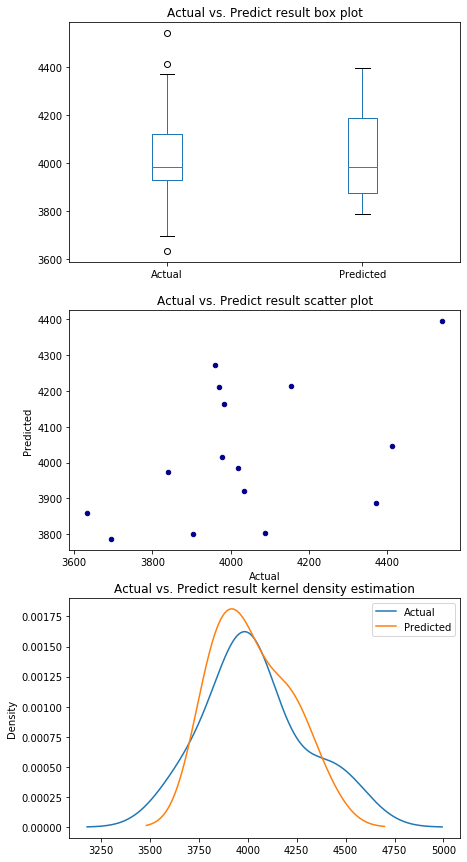

In [37]:
evaluate_performances(y_test_i, i_predictions)

#visualize
visualize_graph(df_ind_pred)

In [38]:
# Visualization
def visualization_i(y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_pred)),y_pred,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_pred)),y_test_i,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

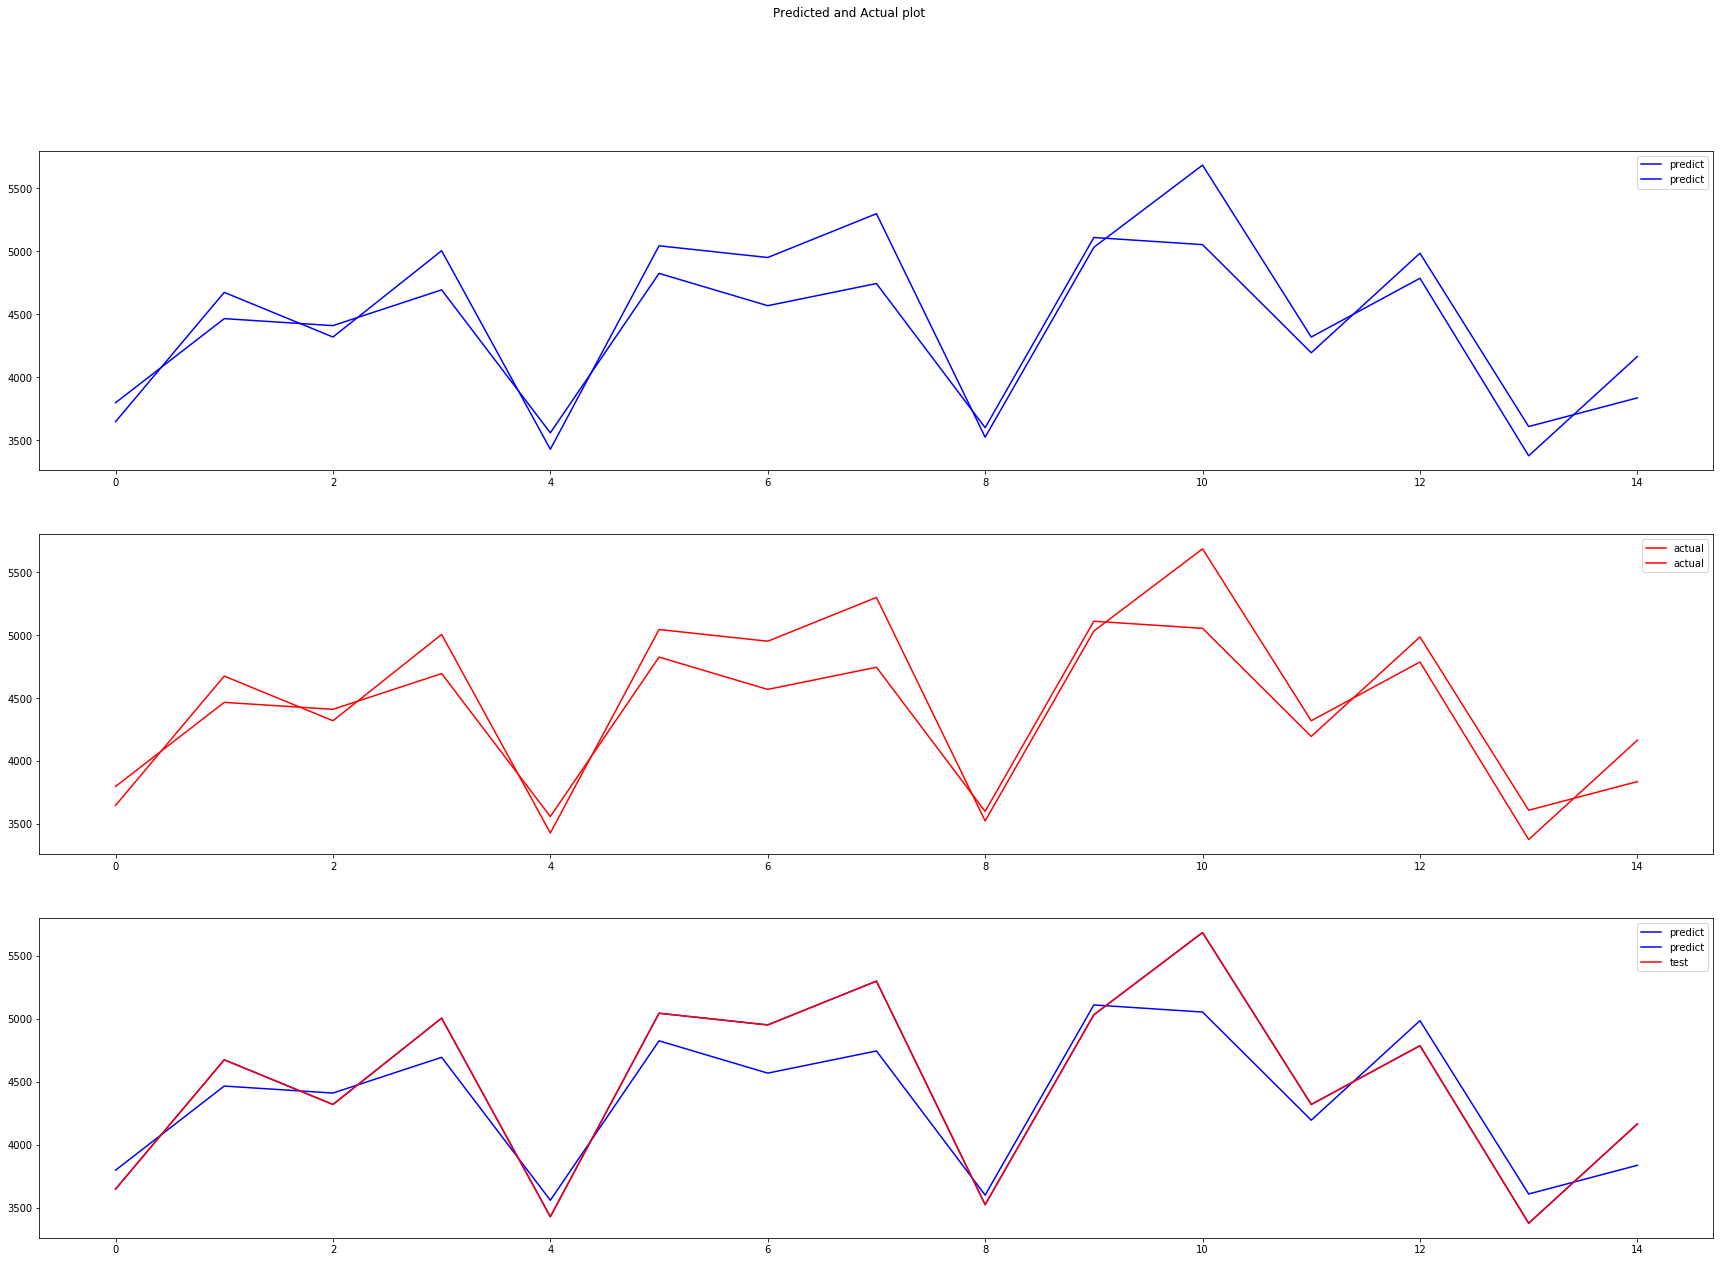

In [39]:
visualization_r(df_res_pred)